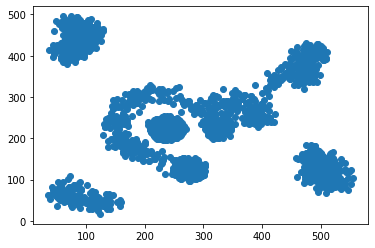

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.utils import shuffle

import pygame

data = np.empty((0,2), dtype='f')

def createData(position):
    (x,y) = position
    r = np.random.uniform(0,30)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi)]
    global data
    data = np.append(data,[coord],axis=0)
    
radius = 2
color = (0,0,255)
thickness = 0

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption('data generator')

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        createData(pygame.mouse.get_pos())
            
            
    screen.fill(bg_color)
    for point in data:
        pygame.draw.circle(screen,color,(int(point[0]),int(point[1])),radius,thickness)
    pygame.display.flip()
    
pygame.quit()

plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(data)
all_predictions = model.predict(data)

listMask = []
for item in all_predictions:
    if item == 0: 
        listMask.append(-1) 
    else: 
        listMask.append(1) 
        
print(listMask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [7]:
from random import randrange

def svm_sgd(X, y):
    w = np.zeros(len(X[0]))
    epochs = 1000
    
    for epoch in range(1,epochs):
        h = 1/epoch
        X_, y_ = shuffle(X, y)
        for i, x in enumerate(X_):
            distance = 1 - y_[i]*(np.dot(X_[i], w))
            if max(0,distance) == 0:
                w[:-1] -= h*(w[:-1])/len(X_)
            else:
                w[:-1] -= h*(w[:-1] - X_[i][:-1]*y_[i])/len(X_)
                w[-1] -= h*y_[i]
    return w

[-2.97236011e-01  1.96327168e-02 -9.06251400e+01]
[1. 1. 1. ... 1. 1. 1.]


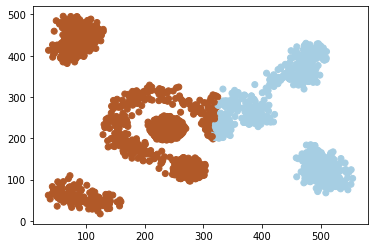

In [8]:
X1 = np.array(data)
bias = np.array([[-1 for i in range(X1.shape[0])]])
X1 = np.append(X1, bias.T, axis=1)
y_ = listMask

w = svm_sgd(X1, y_)
print(w)

y_test = np.sign(np.dot(X1, w))
print(y_test)

plt.scatter(X1[:,0], X1[:,1], c=y_test, cmap=plt.cm.Paired)
#plt.plot([0,w[-1]/w[0]],[w[-1]/w[1],0], marker='s')
plt.show()